In [1]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('/Users/amulya/Documents/GISMA Academics/research/dataset_cleaning/train_triage.csv')

In [3]:
df

,Unnamed: 0.1,Unnamed: 0,dep_name,age,gender,ethnicity,race,lang,religion,maritalstatus,...,meds_diuretics,meds_diagnostic,meds_cough/coldpreparations,meds_contraceptives,meds_colonystimulatingfactors,meds_cnsdrugs,meds_thyroidpreps,meds_unclassifieddrugproducts,meds_vitamins,esi
0,169933,169933,A,26.0,Male,Hispanic or Latino,Other,English,Christian,Married,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
1,182450,182450,A,21.0,Female,Non-Hispanic,Black or African American,English,None,Single,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2,323843,323843,C,80.0,Female,Non-Hispanic,White or Caucasian,English,Catholic,Married,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
3,48386,48386,A,49.0,Male,Non-Hispanic,White or Caucasian,English,Catholic,Single,...,1.0,0.0,0.0,0.0,0.0,6.0,1.0,1.0,2.0,3.0
4,521646,521646,C,70.0,Male,Non-Hispanic,White or Caucasian,English,Episcopal,Divorced,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448383,517071,517071,A,66.0,Male,Non-Hispanic,White or Caucasian,English,Catholic,Married,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
448384,359443,359443,B,62.0,Female,Non-Hispanic,White or Caucasian,English,Catholic,Single,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
448385,513110,513110,B,37.0,Female,Non-Hispanic,White or Caucasian,English,Catholic,Legally Separated,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0
448386,172873,172873,A,36.0,Female,Non-Hispanic,White or Caucasian,English,Jewish,Divorced,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0


In [4]:
df['cc_fatigue'].unique()

array([ 0.,  1., nan,  2.])

In [5]:
df = df.drop('Unnamed: 0.1',axis=1)

In [ ]:
df = df.set_index('Unnamed: 0')

In [8]:
df = df.drop('dep_name',axis = 1)
df = df.drop('religion',axis = 1)

In [9]:
df

,age,gender,ethnicity,race,lang,maritalstatus,employstatus,insurance_status,disposition,arrivalmode,...,meds_diuretics,meds_diagnostic,meds_cough/coldpreparations,meds_contraceptives,meds_colonystimulatingfactors,meds_cnsdrugs,meds_thyroidpreps,meds_unclassifieddrugproducts,meds_vitamins,esi
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
169933,26.0,Male,Hispanic or Latino,Other,English,Married,Not Employed,Other,Discharge,Car,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
182450,21.0,Female,Non-Hispanic,Black or African American,English,Single,Not Employed,Medicaid,Discharge,Car,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
323843,80.0,Female,Non-Hispanic,White or Caucasian,English,Married,Retired,Medicare,Discharge,Car,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
48386,49.0,Male,Non-Hispanic,White or Caucasian,English,Single,Disabled,Medicare,Admit,Car,...,1.0,0.0,0.0,0.0,0.0,6.0,1.0,1.0,2.0,3.0
521646,70.0,Male,Non-Hispanic,White or Caucasian,English,Divorced,Self Employed,Commercial,Discharge,Car,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517071,66.0,Male,Non-Hispanic,White or Caucasian,English,Married,Part Time,Medicare,Admit,Car,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
359443,62.0,Female,Non-Hispanic,White or Caucasian,English,Single,Not Employed,Medicaid,Discharge,Walk-in,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
513110,37.0,Female,Non-Hispanic,White or Caucasian,English,Legally Separated,Not Employed,Medicaid,Admit,ambulance,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0


encode the floats to int

In [15]:
str_col = []
import numpy as np
for i in df.columns:
    if np.dtype(df[i]) != 'float' :
        str_col.append(i)
        print(i)
        

gender
ethnicity
race
lang
maritalstatus
employstatus
insurance_status
disposition
arrivalmode
arrivalmonth
arrivalday
arrivalhour_bin


In [16]:
from sklearn import preprocessing

l1 = preprocessing.LabelEncoder()
l2 = preprocessing.LabelEncoder()
l3 = preprocessing.LabelEncoder()
l4 = preprocessing.LabelEncoder()
l5 = preprocessing.LabelEncoder()
l6 = preprocessing.LabelEncoder()
l7 = preprocessing.LabelEncoder()
l8 = preprocessing.LabelEncoder()
l9 = preprocessing.LabelEncoder()
l10 = preprocessing.LabelEncoder()
l11 = preprocessing.LabelEncoder()
l12 = preprocessing.LabelEncoder()
lencode = [l1,l2,l3,l4,l5,l6,l7,l8,l9,l10,l11,l12]


In [17]:
a = 0
for i in str_col:
    df[i] = lencode[a].fit_transform(df[i])
    a = a+1
    

In [19]:
rows = df.shape[0]

In [20]:
cols_nan = []
for i in df.columns:
    if df[i].isna().sum() >= 0.5*rows:
        print(i)
        cols_nan.append(i)

In [21]:
df = df[df['esi'].notna()]

In [22]:
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

In [23]:
df_imputed = pd.DataFrame(imp.fit_transform(df))
df_imputed.columns = df.columns
df_imputed.index = df.index

In [24]:
df_imputed.isna().sum()

age                              0
gender                           0
ethnicity                        0
race                             0
lang                             0
                                ..
meds_cnsdrugs                    0
meds_thyroidpreps                0
meds_unclassifieddrugproducts    0
meds_vitamins                    0
esi                              0
Length: 276, dtype: int64

In [25]:
df_imputed

,age,gender,ethnicity,race,lang,maritalstatus,employstatus,insurance_status,disposition,arrivalmode,...,meds_diuretics,meds_diagnostic,meds_cough/coldpreparations,meds_contraceptives,meds_colonystimulatingfactors,meds_cnsdrugs,meds_thyroidpreps,meds_unclassifieddrugproducts,meds_vitamins,esi
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
169933,26.0,1.0,0.0,4.0,0.0,4.0,2.0,3.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
182450,21.0,0.0,1.0,2.0,0.0,7.0,2.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
323843,80.0,0.0,1.0,7.0,0.0,4.0,5.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
48386,49.0,1.0,1.0,7.0,0.0,7.0,0.0,2.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,6.0,1.0,1.0,2.0,3.0
521646,70.0,1.0,1.0,7.0,0.0,1.0,6.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517071,66.0,1.0,1.0,7.0,0.0,4.0,4.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
359443,62.0,0.0,1.0,7.0,0.0,7.0,2.0,1.0,1.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
513110,37.0,0.0,1.0,7.0,0.0,2.0,2.0,1.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0


In [26]:
for i in df_imputed.columns:
    if i.startswith('cc'):
        df_imputed.drop(df_imputed.loc[df_imputed[i]>1].index, inplace=True)

In [27]:
df_imputed['esi'] = df_imputed['esi'].astype('int')
df_imputed['age'] = df_imputed['age'].astype('int')
for i in str_col[:]:
    df_imputed[i] = df_imputed[i].astype('int')
df_imputed

,age,gender,ethnicity,race,lang,maritalstatus,employstatus,insurance_status,disposition,arrivalmode,...,meds_diuretics,meds_diagnostic,meds_cough/coldpreparations,meds_contraceptives,meds_colonystimulatingfactors,meds_cnsdrugs,meds_thyroidpreps,meds_unclassifieddrugproducts,meds_vitamins,esi
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
169933,26,1,0,4,0,4,2,3,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
182450,21,0,1,2,0,7,2,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
323843,80,0,1,7,0,4,5,2,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
48386,49,1,1,7,0,7,0,2,0,0,...,1.0,0.0,0.0,0.0,0.0,6.0,1.0,1.0,2.0,3
521646,70,1,1,7,0,1,6,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517071,66,1,1,7,0,4,4,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
359443,62,0,1,7,0,7,2,1,1,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
513110,37,0,1,7,0,2,2,1,0,6,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3


In [28]:
df_imputed.to_csv('train_triage_imputed.csv')

label encode esi [0,1,2,3,4] \
esi 1 = 0 \
esi 2 = 1\
esi 3 = 2\
esi 4 = 3\
esi 5 =4

#train rf

In [29]:
X= df_imputed.drop(['esi'],axis=1)
#add target values to y
y = df_imputed["esi"]
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier

model_xg = xgboost\
model_rf = randomf

In [45]:
model_xg = XGBClassifier(num_class=5,reg_lambda =20,learning_rate = 0.1, max_depth = 200,n_estimators = 100,sampling_method = 'gradient_based',tree_method = 'hist',max_leaves = 25000,objective='multi:softmax',n_jobs=-1,verbosity=1)
model_xg.fit(X, y)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=200, max_leaves=25000,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_class=5, num_parallel_tree=None,
              objective='multi:softmax', ...)

In [46]:
model_rf = RandomForestClassifier(max_depth=120,min_samples_split=100,min_samples_leaf=2,verbose=1,n_jobs=-1)
model_rf.fit(X,y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   52.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.0min finished


RandomForestClassifier(max_depth=120, min_samples_leaf=2, min_samples_split=100,
                       n_jobs=-1, verbose=1)

Preprocess data for testing

In [31]:
df_test = pd.read_csv('/Users/amulya/Documents/GISMA Academics/research/dataset_cleaning/test_triage.csv')

In [32]:
df_test = df_test.drop('Unnamed: 0.1',axis=1)
df_test = df_test.set_index('Unnamed: 0')
df_test = df_test.drop('dep_name',axis = 1)
df_test = df_test.drop('religion',axis = 1)

In [33]:
str_col = []
import numpy as np
for i in df_test.columns:
    if np.dtype(df_test[i]) != 'float64' :
        str_col.append(i)
        print(i)

gender
ethnicity
race
lang
maritalstatus
employstatus
insurance_status
disposition
arrivalmode
arrivalmonth
arrivalday
arrivalhour_bin


In [34]:
a = 0
for i in str_col[:]:
    df_test[i] = lencode[a].transform(df_test[i])
    a = a+1

In [35]:
df_test = df_test[df_test['esi'].notna()]

In [36]:
df_test

,age,gender,ethnicity,race,lang,maritalstatus,employstatus,insurance_status,disposition,arrivalmode,...,meds_diuretics,meds_diagnostic,meds_cough/coldpreparations,meds_contraceptives,meds_colonystimulatingfactors,meds_cnsdrugs,meds_thyroidpreps,meds_unclassifieddrugproducts,meds_vitamins,esi
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
498535,63.0,1,1,2,0,4,2,1,1,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
221329,29.0,0,1,2,0,4,1,0,1,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
372605,80.0,0,1,1,1,7,5,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
487944,56.0,0,0,4,1,1,2,3,1,6,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0
349964,62.0,0,1,2,0,4,0,1,1,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70666,69.0,1,1,7,0,4,6,0,1,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
557518,88.0,0,1,7,0,9,5,2,0,6,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,3.0
58205,64.0,1,1,7,0,4,5,0,1,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


In [37]:
df_test_imputed = pd.DataFrame(imp.transform(df_test))
df_test_imputed.columns = df_test.columns
df_test_imputed.index = df_test.index

In [38]:
df_test_imputed.isna().sum()

age                              0
gender                           0
ethnicity                        0
race                             0
lang                             0
                                ..
meds_cnsdrugs                    0
meds_thyroidpreps                0
meds_unclassifieddrugproducts    0
meds_vitamins                    0
esi                              0
Length: 276, dtype: int64

In [39]:
df_test_imputed['esi'] = df_test_imputed['esi'].astype('int')
df_test_imputed['age'] = df_test_imputed['age'].astype('int')
for i in str_col[:]:
    df_test_imputed[i] = df_test_imputed[i].astype('int')
df_test_imputed


,age,gender,ethnicity,race,lang,maritalstatus,employstatus,insurance_status,disposition,arrivalmode,...,meds_diuretics,meds_diagnostic,meds_cough/coldpreparations,meds_contraceptives,meds_colonystimulatingfactors,meds_cnsdrugs,meds_thyroidpreps,meds_unclassifieddrugproducts,meds_vitamins,esi
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
498535,63,1,1,2,0,4,2,1,1,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
221329,29,0,1,2,0,4,1,0,1,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
372605,80,0,1,1,1,7,5,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
487944,56,0,0,4,1,1,2,3,1,6,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3
349964,62,0,1,2,0,4,0,1,1,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70666,69,1,1,7,0,4,6,0,1,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
557518,88,0,1,7,0,9,5,2,0,6,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,3
58205,64,1,1,7,0,4,5,0,1,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [41]:
for i in df_test_imputed.columns:
    if i.startswith('cc'):
        df_test_imputed.drop(df_test_imputed.loc[df_test_imputed[i]>1].index, inplace=True)

In [42]:
df_test_imputed

,age,gender,ethnicity,race,lang,maritalstatus,employstatus,insurance_status,disposition,arrivalmode,...,meds_diuretics,meds_diagnostic,meds_cough/coldpreparations,meds_contraceptives,meds_colonystimulatingfactors,meds_cnsdrugs,meds_thyroidpreps,meds_unclassifieddrugproducts,meds_vitamins,esi
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
498535,63,1,1,2,0,4,2,1,1,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
221329,29,0,1,2,0,4,1,0,1,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
372605,80,0,1,1,1,7,5,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
487944,56,0,0,4,1,1,2,3,1,6,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3
349964,62,0,1,2,0,4,0,1,1,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70666,69,1,1,7,0,4,6,0,1,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
557518,88,0,1,7,0,9,5,2,0,6,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,3
58205,64,1,1,7,0,4,5,0,1,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [44]:
df_test_imputed.to_csv('test_triage_imputed.csv')

In [43]:
X_test= df_test_imputed.drop(['esi'],axis=1)
#add target values to y
y_test = df_test_imputed["esi"]
y_test = le.transform(y_test)

y_predict1 = rf \
accuracy1 = rf =  0.7251601343784995 \
y_predict2 = xg \
accuracy2 = xg  0.9216483762597985 \


In [47]:
y_predict_rf = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_predict_rf)
accuracy_rf

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.4s finished


0.725567789233765

In [48]:
y_predict_xg = model_xg.predict(X_test)
accuracy_xg= accuracy_score(y_test, y_predict_xg)
accuracy_xg

0.9218151308764279

auc = 0.9301341058925006 = rf \
auc = 0.9858439889468084 = xg \

In [49]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, model_rf.predict_proba(X_test), multi_class='ovr')

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.3s finished


0.9302954495065221

In [50]:
roc_auc_score(y_test, model_xg.predict_proba(X_test), multi_class='ovr')

0.985860205622283

clf = rf \
acc = rf = 0.7368331466965286 \
y_predict_clf = rf \
clf_xg = xg \
y_predict_clf_xg = xg \
acc_xg = 0.9290571108622621 = xg

In [51]:
clf_rf = OneVsRestClassifier(model_rf)
clf_rf.fit(X, y)
y_predict_clf_rf = clf_rf.predict(X_test)
acc_clf_rf = accuracy_score(y_test,y_predict_clf_rf)
acc_clf_rf

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   51.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   42.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   48.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   41.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.9min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   34.8s
[Parallel(n_jobs=-1)]: Don

0.7372690481959063

In [52]:
clf_xg = OneVsRestClassifier(model_xg)
clf_xg.fit(X, y)
y_predict_clf_xg = clf_xg.predict(X_test)
acc_clf_xg = accuracy_score(y_test,y_predict_clf_xg)
acc_clf_xg

0.9292809648154629

In [53]:
roc_auc_score(y_test, clf_xg.predict_proba(X_test), multi_class='ovr')

0.986979838892748

In [54]:
roc_auc_score(y_test, clf_rf.predict_proba(X_test), multi_class='ovr')

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    3.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_job

0.9355638024475696

In [56]:
from sklearn.metrics import classification_report

In [57]:
target_names=['ESI 1','ESI 2','ES! 3','ESI 4','ESI 5']
report1 = classification_report(y_test, y_predict_clf_xg, target_names=target_names)
print(report1)

              precision    recall  f1-score   support

       ESI 1       0.96      0.74      0.83      1058
       ESI 2       0.94      0.93      0.93     32778
       ES! 3       0.93      0.94      0.93     46893
       ESI 4       0.92      0.94      0.93     25116
       ESI 5       0.94      0.87      0.90      5596

    accuracy                           0.93    111441
   macro avg       0.94      0.88      0.91    111441
weighted avg       0.93      0.93      0.93    111441



In [60]:
esi = ['ESI 1','ESI 2','ESI 3','ESI 4','ESI 5']
pre = [0.96,0.94,0.93,0.92,0.94]
recall = [0.74,0.93,0.94,0.94,0.87]
f1 = [0.83,0.93,0.93,0.93,0.90]
sup = [1058,32778,46893,25116,5596]
report_df_XD = pd.DataFrame(
    {'ESI': esi,
     'Precision': pre,
     'Recall': recall,
     'F1 Score': f1,
     'Support': sup

    })

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot: xlabel='ESI', ylabel='Recall'>

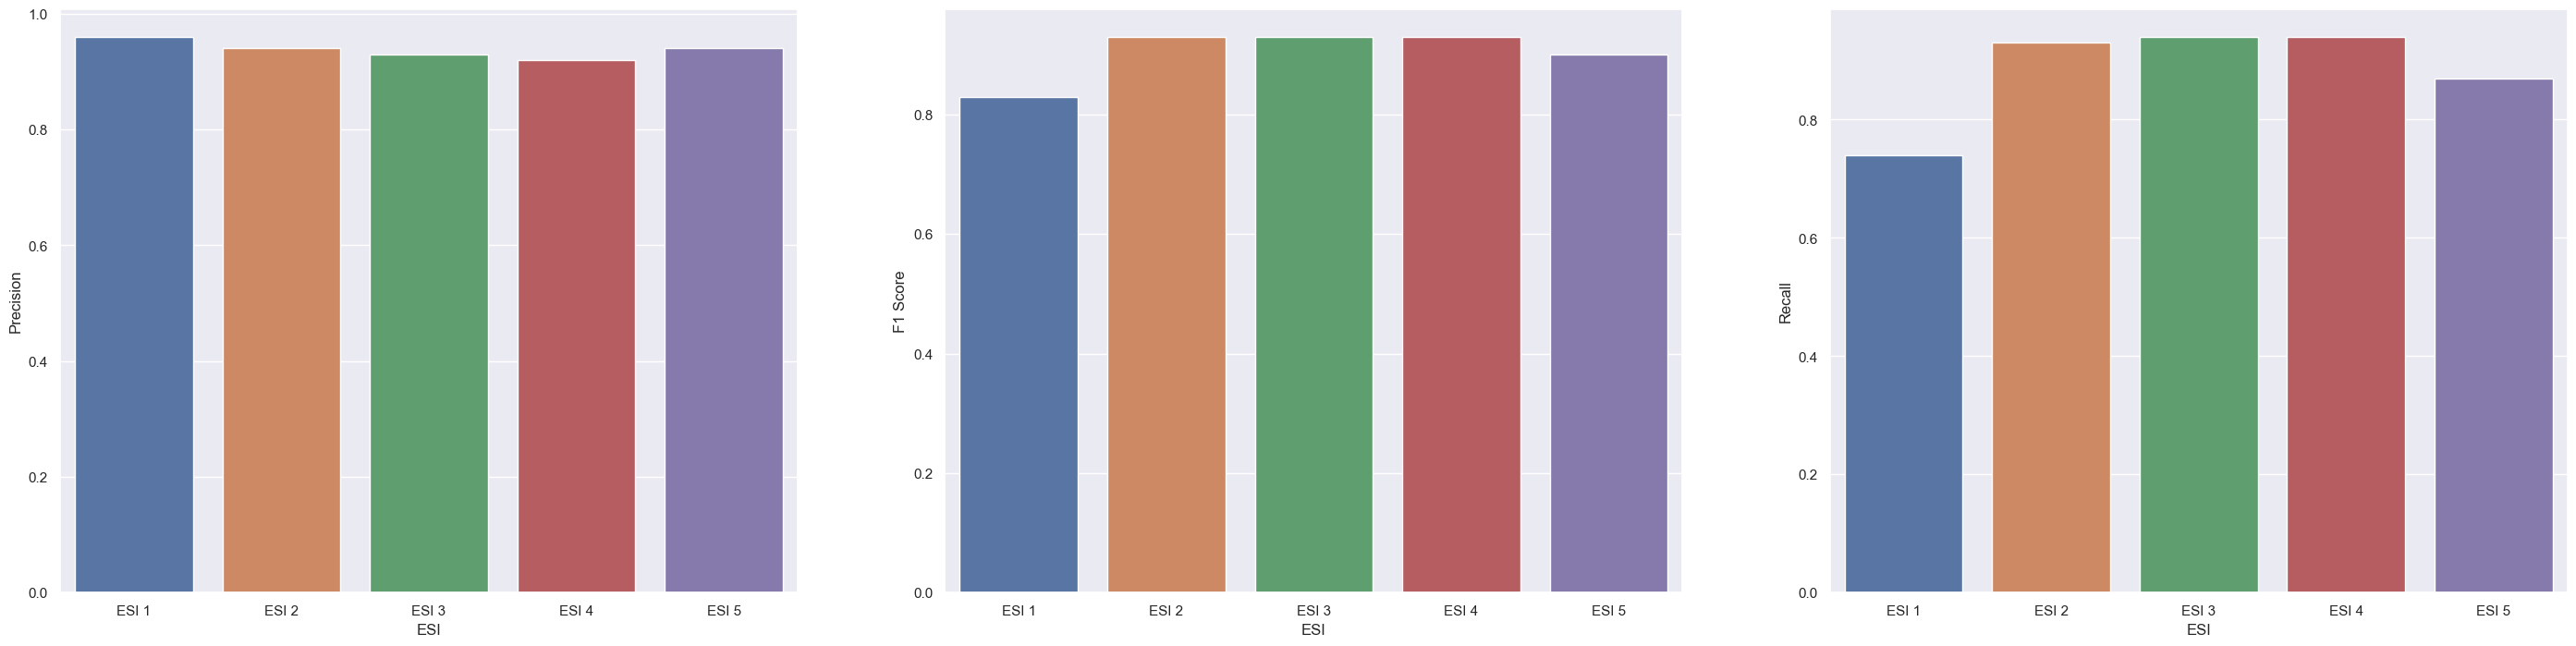

In [62]:
fig, axes = plt.subplots(1,3)
sns.set_color_codes
sns.set
sns.set_style
sns.set(rc={'figure.figsize':(55,5)})
#create chart in each subplot
sns.barplot(data=report_df_XD, x='ESI', y='Precision', ax=axes[0])
sns.barplot(data=report_df_XD, x='ESI', y='F1 Score', ax=axes[1])
sns.barplot(data=report_df_XD, x='ESI', y='Recall', ax=axes[2])
#sns.barplot(data=report_df_RF, x='ESI', y='Support', ax=axes[1,1])

In [63]:
from sklearn.metrics import classification_report
#target_names = ['esi1', 'esi2', 'esi3','esi4','esi5']
report = classification_report(y_test, y_predict_clf_rf, target_names=target_names)
print(report)

              precision    recall  f1-score   support

       ESI 1       0.81      0.21      0.33      1058
       ESI 2       0.77      0.71      0.74     32778
       ES! 3       0.73      0.78      0.75     46893
       ESI 4       0.71      0.77      0.74     25116
       ESI 5       0.73      0.46      0.56      5596

    accuracy                           0.74    111441
   macro avg       0.75      0.59      0.63    111441
weighted avg       0.74      0.74      0.73    111441



In [64]:
esi = ['ESI 1','ESI 2','ESI 3','ESI 4','ESI 5']
pre = [0.81,0.77,0.73,0.71,0.73]
recall = [0.21,0.71,0.78,0.77,0.46]
f1 = [0.33,0.74,0.75,0.74,0.56]
sup = [1058,32778,46893,25116,5596]
report_df_RF = pd.DataFrame(
    {'ESI': esi,
     'Precision': pre,
     'Recall': recall,
     'F1 Score': f1,
     'Support': sup

    })

<AxesSubplot: xlabel='ESI', ylabel='Recall'>

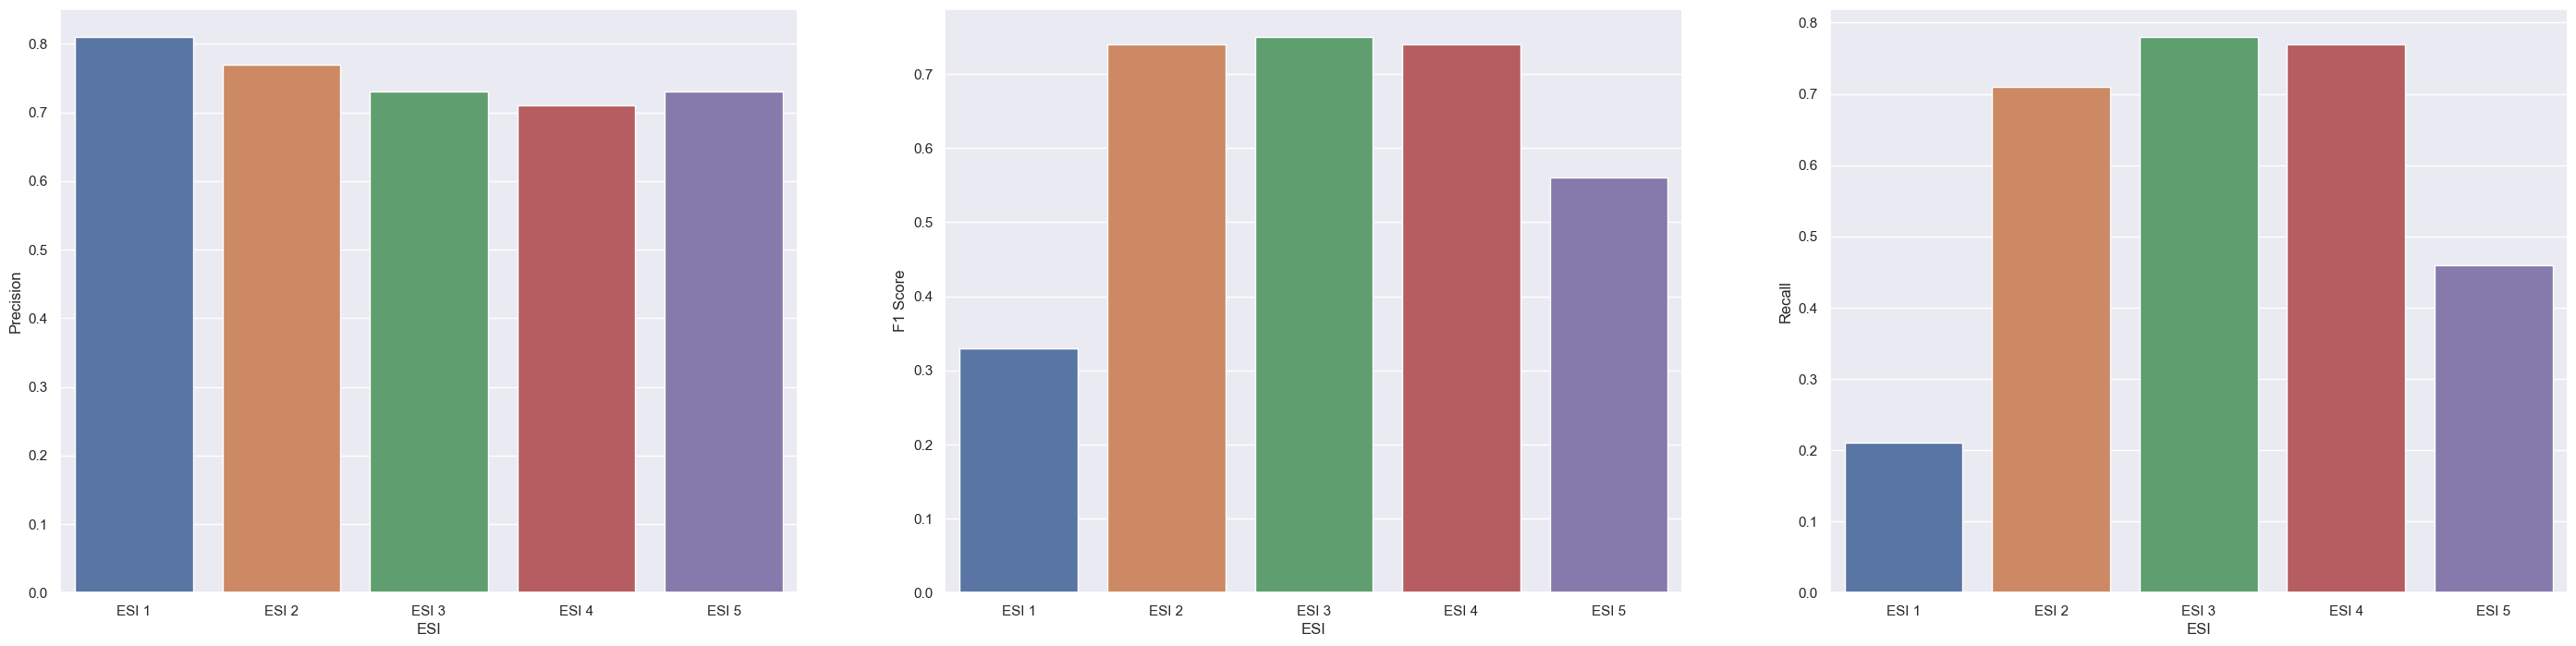

In [66]:
fig, axes = plt.subplots(1,3)
sns.set_color_codes
sns.set
sns.set_style
sns.set(rc={'figure.figsize':(35,10)})
#create chart in each subplot
sns.barplot(data=report_df_RF, x='ESI', y='Precision', ax=axes[0])
sns.barplot(data=report_df_RF, x='ESI', y='F1 Score', ax=axes[1])
sns.barplot(data=report_df_RF, x='ESI', y='Recall', ax=axes[2])
#sns.barplot(data=report_df_RF, x='ESI', y='Support', ax=axes[1,1])

In [84]:
red,yellow,green = 0,0,0
for i in y_predict_clf_xg:
    if i == 0 or i == 1:
        red = red+1
        #print(atp_RF)
    if i == 2 or i == 3:
        yellow=yellow+1
        #print(atp_RF)
    if i == 4:
        green = green+1
        
x = ['Red','Yellow','Green']
y = [red,yellow,green]

Text(0, 0.5, 'Patients')

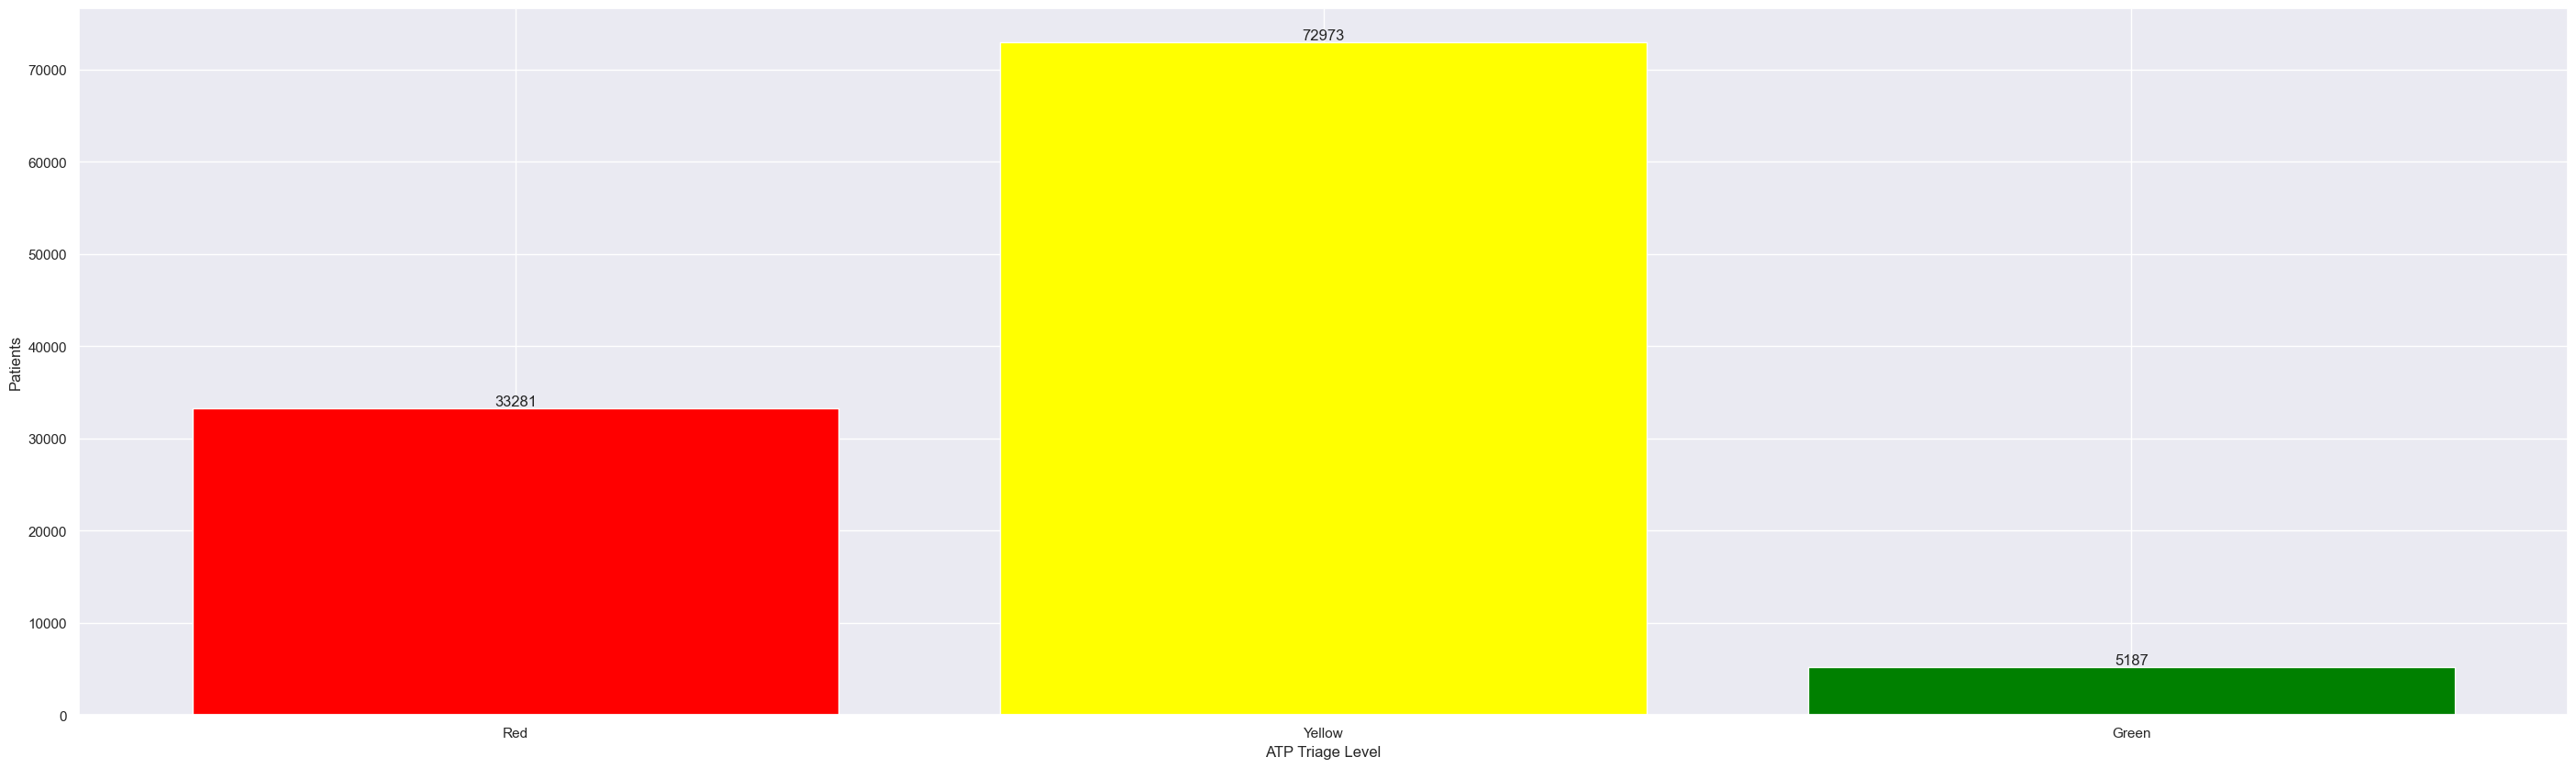

In [86]:
a = plt.bar(x,y,color = x)
plt.bar_label(a,label_type='edge')
plt.xlabel('ATP Triage Level')
plt.ylabel('Patients')

In [85]:
red,yellow,green = 0,0,0
for i in y_predict_clf_rf:
    if i == 0 or i == 1:
        red = red+1
        #print(atp_RF)
    if i == 2 or i == 3:
        yellow=yellow+1
        #print(atp_RF)
    if i == 4:
        green = green+1
        
x1 = ['Red','Yellow','Green']
y1 = [red,yellow,green]

Text(0, 0.5, 'Patients')

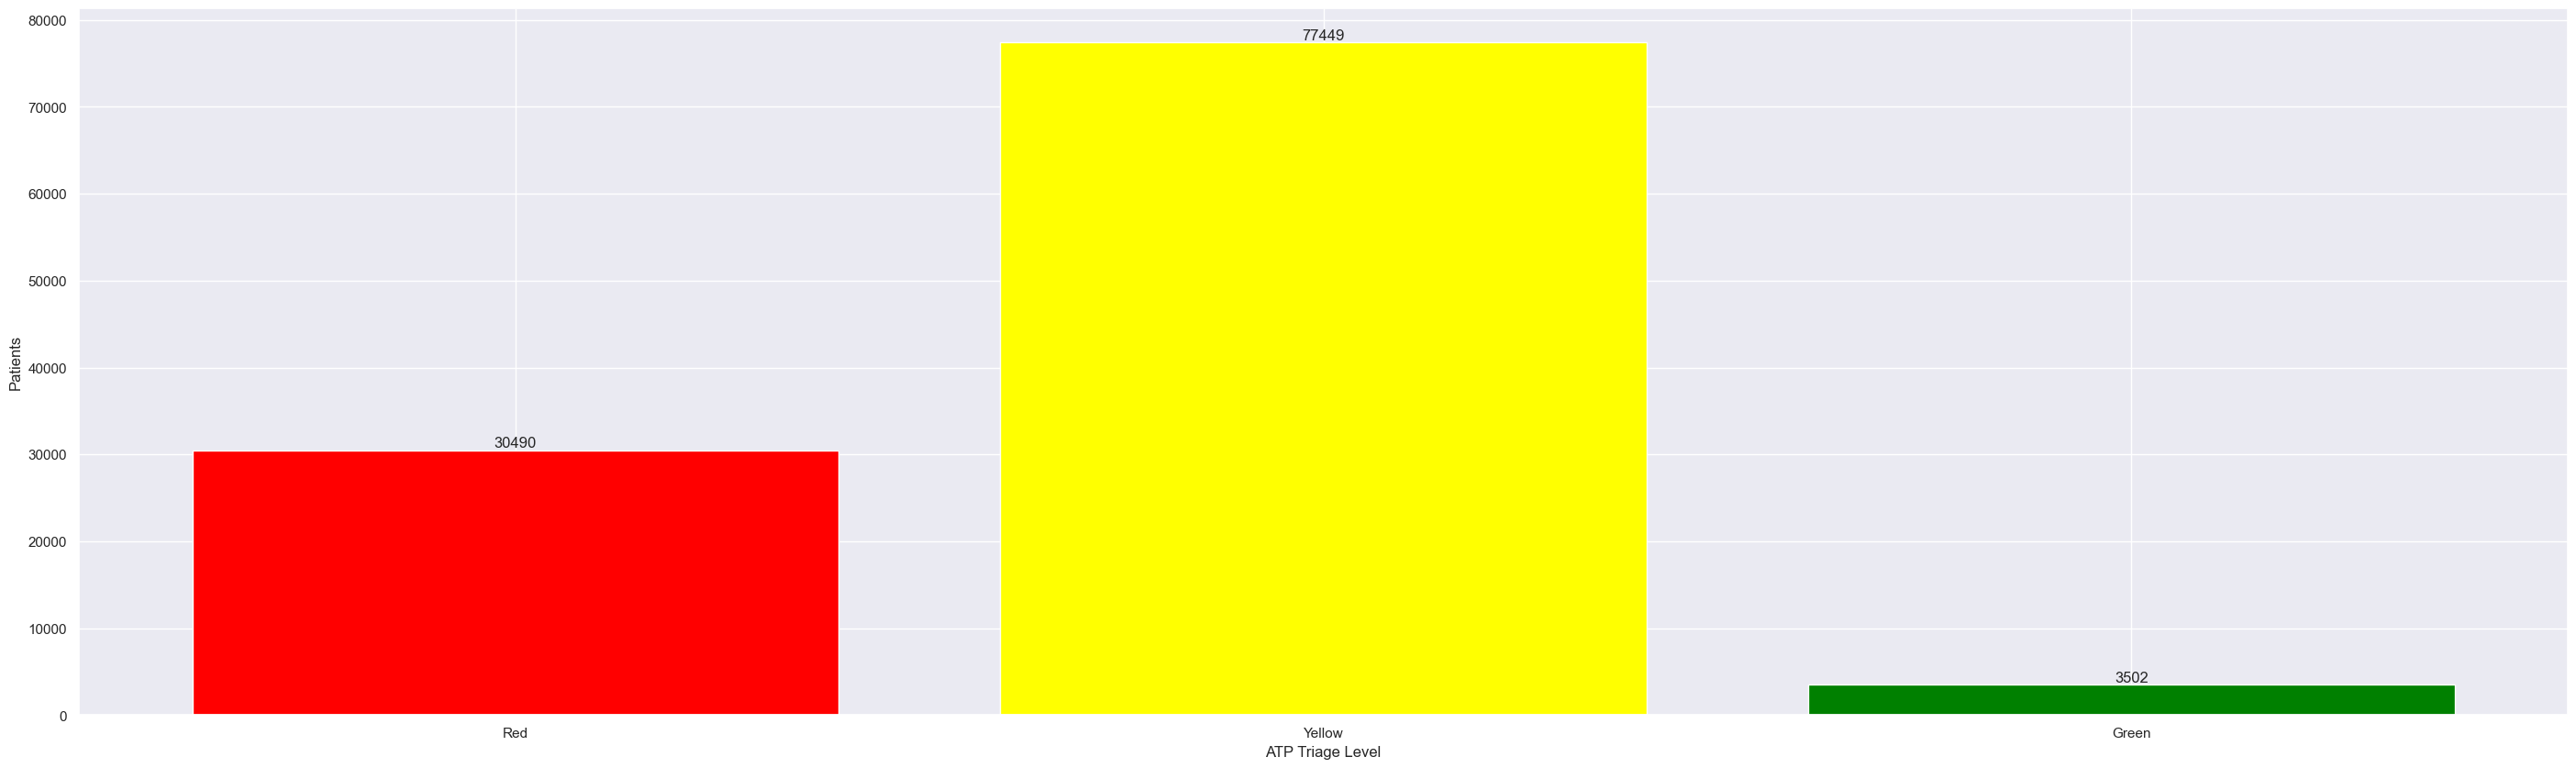

In [87]:
import matplotlib.pyplot as plt
b = plt.bar(x1,y1,color = x1)
plt.bar_label(b,label_type='edge')
plt.xlabel('ATP Triage Level')
plt.ylabel('Patients')

XGBoost

In [71]:
import pickle


In [72]:
filename = 'XG_triage_ATP_new.sav'
pickle.dump(clf_xg, open(filename, 'wb'))

In [73]:
filename = 'RF_triage_ATP_new.sav'
pickle.dump(clf_rf, open(filename, 'wb'))

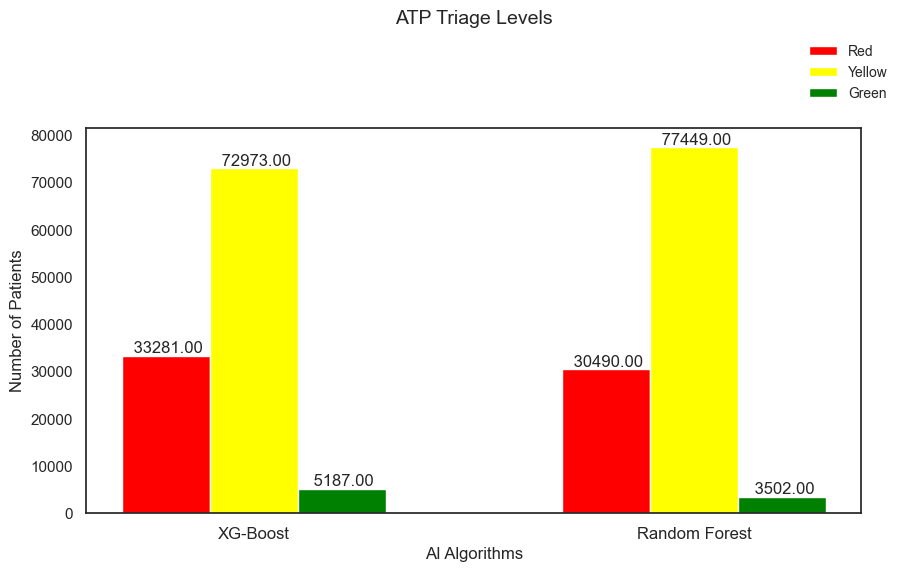

In [104]:
labels = ['XG-Boost','Random Forest']
x_axis = np.arange(2)
red = [33281,30490]
yellow = [72973,77449]
green = [5187,3502]
#plt.style.use('seaborn-v0_8-ticks')
plt.figure(figsize=(10,5))
bar1 = plt.bar(x_axis - 0.2, red, 0.2, label = "Red",color='red') 
bar2 = plt.bar(x_axis + 0, yellow, 0.2, label = "Yellow",color = 'yellow')
bar3 = plt.bar(x_axis + 0.2, green, 0.2, label = "Green",color='green')
for rect in bar1 + bar2 + bar3: 
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height: .2f}', ha= 'center', va='bottom')
plt.xticks(x_axis, labels, fontsize=12) 
plt.xlabel("AI Algorithms", fontsize =12) 
plt.ylabel("Number of Patients", fontsize =12) 
plt.title("ATP Triage Levels", fontsize=14, y = 1.25) 
plt.legend( fontsize =10, facecolor ='white',bbox_to_anchor=(1.05, 1.25)) 
#legend =plt.legend() 
#frame =legend.get_frame() 
frame.set_color("white") 
plt.ylim(0,81500) 
plt.show()

In [ ]:
cm=confusion_matrix(y_test,y_predict_clf_rf)